In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import log_loss
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('./MORTGAG07-18_TOTAL_WITH_DEFAULT_SELECTED.csv')

In [3]:
df = df.reindex(sorted(df.columns), axis=1)

In [4]:
df.columns

Index(['Unnamed: 0', 'addr_state', 'all_util', 'annual_inc', 'default',
       'delinq_2yrs', 'desc', 'dti', 'earliest_cr_line', 'emp_length',
       'emp_title', 'fico_range_low', 'funded_amnt', 'grade', 'home_ownership',
       'id', 'initial_list_status', 'inq_last_6mths', 'installment',
       'int_rate', 'last_pymnt_d', 'loan_amnt', 'loan_status', 'open_acc',
       'out_prncp', 'pub_rec', 'pub_rec_bankruptcies', 'purpose', 'revol_bal',
       'revol_util', 'sub_grade', 'term', 'title', 'total_acc', 'total_pymnt',
       'total_rec_prncp', 'verification_status', 'year', 'zip_code'],
      dtype='object')

In [5]:
df

,Unnamed: 0,addr_state,all_util,annual_inc,default,delinq_2yrs,desc,dti,earliest_cr_line,emp_length,emp_title,fico_range_low,funded_amnt,grade,home_ownership,id,initial_list_status,inq_last_6mths,installment,int_rate,last_pymnt_d,loan_amnt,loan_status,open_acc,out_prncp,pub_rec,pub_rec_bankruptcies,purpose,revol_bal,revol_util,sub_grade,term,title,total_acc,total_pymnt,total_rec_prncp,verification_status,year,zip_code
0,0,CA,NaN,58000.0,1,0.0,NaN,14.92,Sep-1989,8 years,Truck Driver Delivery Personel,710.0,10400.0,A,MORTGAGE,36805548,w,2.0,321.08,6.99%,Aug-2016,10400.0,Charged Off,17.0,0.0,0.0,0.0,credit_card,6133.0,31.6%,A3,36 months,Credit card refinancing,36.0,6611.690000,5217.75,Not Verified,2014,937xx
1,2,NY,NaN,75000.0,0,0.0,NaN,23.63,Jan-2001,10+ years,Deputy sheriff,675.0,17000.0,C,MORTGAGE,37682226,f,0.0,578.22,13.66%,May-2016,17000.0,Fully Paid,7.0,0.0,0.0,0.0,debt_consolidation,5063.0,46.4%,C3,36 months,Debt consolidation,31.0,19562.310001,17000.00,Verified,2014,144xx
2,4,MN,NaN,89000.0,0,0.0,NaN,13.77,Oct-2001,< 1 year,Manufacturing Engineer,685.0,2500.0,B,MORTGAGE,37741884,f,1.0,83.03,11.99%,Jun-2015,2500.0,Fully Paid,9.0,0.0,0.0,0.0,home_improvement,22908.0,94.3%,B5,36 months,Home improvement,32.0,2622.220000,2500.00,Source Verified,2014,554xx
3,5,KY,NaN,120000.0,0,3.0,NaN,6.87,Jul-1989,10+ years,Assistant manager,660.0,6000.0,B,MORTGAGE,37742129,f,0.0,194.99,10.49%,Apr-2017,6000.0,Fully Paid,11.0,0.0,0.0,0.0,home_improvement,49626.0,82.6%,B3,36 months,Home improvement,48.0,6839.302523,6000.00,Not Verified,2014,403xx
4,7,CO,NaN,108000.0,1,0.0,NaN,23.37,Mar-2003,10+ years,construction foreman,680.0,18450.0,C,MORTGAGE,37822030,f,3.0,633.36,14.31%,Feb-2016,18450.0,Charged Off,11.0,0.0,0.0,0.0,home_improvement,5925.0,87%,C4,36 months,Home improvement,20.0,9387.620000,5481.70,Not Verified,2014,810xx
5,8,IN,NaN,42000.0,0,0.0,NaN,18.89,Apr-2007,8 years,Asset Protection,675.0,10800.0,B,MORTGAGE,37791988,f,1.0,345.91,9.49%,Jun-2017,10800.0,Fully Paid,19.0,0.0,0.0,0.0,debt_consolidation,10213.0,77.4%,B2,36 months,Debt consolidation,30.0,12379.606221,10800.00,Verified,2014,467xx
6,9,TX,NaN,84000.0,0,0.0,NaN,18.79,Jun-2006,5 years,Director of Operations,685.0,7200.0,C,MORTGAGE,36441833,f,1.0,240.49,12.39%,Jan-2018,7200.0,Fully Paid,11.0,0.0,0.0,0.0,debt_consolidation,5105.0,18.8%,C1,36 months,Debt consolidation,17.0,8645.094132,7200.00,Source Verified,2014,760xx
7,10,AZ,NaN,52000.0,1,0.0,NaN,14.35,Jul-2001,4 years,Teacher,660.0,5000.0,B,MORTGAGE,37661949,f,2.0,162.49,10.49%,Jan-2017,5000.0,Charged Off,9.0,0.0,1.0,1.0,debt_consolidation,466.0,8.8%,B3,36 months,Debt consolidation,39.0,4903.830000,3156.58,Source Verified,2014,853xx
8,11,FL,NaN,67000.0,0,0.0,NaN,16.13,Aug-1994,2 years,Humana Cares Manager,710.0,28000.0,B,MORTGAGE,37692106,w,1.0,601.70,10.49%,Dec-2015,28000.0,Fully Paid,15.0,0.0,0.0,0.0,debt_consolidation,14684.0,35.2%,B3,60 months,Debt consolidation,39.0,30628.650000,28000.00,Source Verified,2014,336xx
9,12,AL,NaN,94000.0,0,0.0,NaN,22.33,Mar-1995,3 years,Senior Logistics Analyst,695.0,8000.0,B,MORTGAGE,10089665,f,2.0,259.99,10.49%,Sep-2015,8000.0,Fully Paid,24.0,0.0,0.0,0.0,debt_consolidation,32776.0,43.9%,B3,36 months,Debt consolidation,58.0,8525.760000,8000.00,Not Verified,2014,358xx


# Data Basics

In [5]:
print('\033[1m'+'Starts assessing the data:'+'\033[0m')
 
print('===============Dimension Checking===============')
print('There are {} rows and {} columns in the dataset, with {} unnamed columns'.format(df.shape[0],df.shape[1],\
      df.columns.str.startswith('Unnamed').sum()))

# Remove Invalid Columns
print('Starts to drop unnmaed columns:')
df = df.loc[:, ~df.columns.str.startswith('Unnamed')]
print('Now, there are {} rows and {} columns in the dataset\n'.format(df.shape[0],df.shape[1]))

print('===============Time Checking===============')
print('\033[1m'+'How many records each year?'+'\033[0m')
print(df.groupby('year')['id'].count())
print('\n')
 
# Check for duplicates
print('===============Duplicate Checking===============')
print('\033[1m'+'Any duplicated records:'+'\033[0m'+ ' {}\n'.format(df.duplicated().any()))

# Check for N/A Values
print('===============N/A Values Checking===============')
print('\033[1m'+'How many N/A values in each colums?\n'+'\033[0m'+'{}\n'.format(df.isnull().sum()))

# Check for Default
print('===============Default Checking===============')
print('\033[1m'+'How many defaults?'+'\033[0m')
print(df.groupby('default')['id'].count())
print('\033[1m'+'How many defaults in each year?'+'\033[0m')
print(df.groupby(['default','year'])['id'].count())

Starts assessing the data:
===============Dimension Checking===============
There are 768532 rows and 39 columns in the dataset, with 1 unnamed columns
Starts to drop unnmaed columns:
Now, there are 768532 rows and 38 columns in the dataset

===============Time Checking===============
How many records each year?
year
2014         117046
2015         187768
2016         174318
2017         112217
2018          47627
2007-2011     18959
2012-2013     97012
2018          13585
Name: id, dtype: int64


===============Duplicate Checking===============
Any duplicated records: False

===============N/A Values Checking===============
How many N/A values in each colums?
addr_state                   0
all_util                411442
annual_inc                   0
default                      0
delinq_2yrs                  7
desc                    704753
dti                        402
earliest_cr_line             7
emp_length               43276
emp_title                47607
fico_range_low      

# Visualization

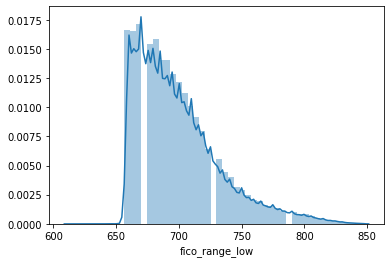

In [6]:
sns.distplot(df['fico_range_low'])

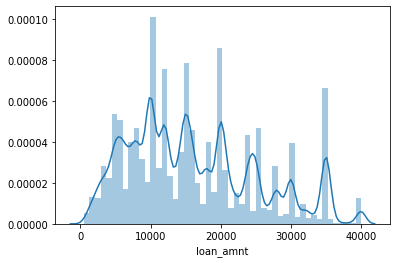

In [7]:
sns.distplot(df['loan_amnt'])

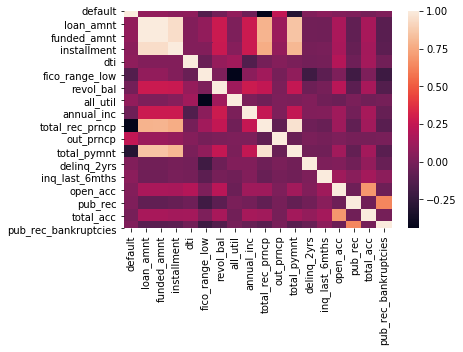

In [8]:
# correlations between all the features
corr = df[["default",'year',"loan_amnt","term","funded_amnt","int_rate","grade","installment",
                      "sub_grade","loan_status","purpose","title","zip_code","dti",
                      "fico_range_low","emp_length","revol_bal","revol_util", "all_util",
                      "home_ownership","annual_inc","total_rec_prncp","verification_status","last_pymnt_d",
                      "out_prncp","total_pymnt","emp_title","desc","addr_state","delinq_2yrs","inq_last_6mths",
                      "open_acc","earliest_cr_line","pub_rec","total_acc","initial_list_status","pub_rec_bankruptcies"]].corr()

# show heapmap of correlations
sns.heatmap(corr)

# Preparition

In [9]:
# Convert all missing values in the specified column to the median
def missing_median(df, name):
    med = df[name].median()
    df[name] = df[name].fillna(med)


# Convert all missing values in the specified column to the default
def missing_default(df, name, default_value):
    df[name] = df[name].fillna(default_value)
    
def encode_text_single_dummy(df, name, target_values):
    for tv in target_values:
        l = list(df[name].astype(str))
        l = [1 if str(x) == str(tv) else 0 for x in l]
        name2 = f"{name}-{tv}"
        df[name2] = l


# Encode text values to indexes(i.e. [1],[2],[3] for red,green,blue).
def encode_text_index(df, name):
    le = preprocessing.LabelEncoder()
    df[name] = le.fit_transform(df[name])
    return le.classes_


In [10]:
select = pd.DataFrame(df.isna().any())
select.columns=['null']

In [11]:
col = select.loc[select['null']==True].index

In [12]:
# df[col.to_list()]
#Needs encode: term,grade,emp_length,verification_status

In [54]:
df_numeric = df[['loan_amnt','funded_amnt','int_rate','installment',\
    'fico_range_low','revol_bal','annual_inc',\
    'out_prncp','total_pymnt','delinq_2yrs','inq_last_6mths',\
    'open_acc','pub_rec','total_acc','pub_rec_bankruptcies']]

In [55]:
df_numeric['int_rate'] = df_numeric['int_rate'].apply(lambda x:float(x.strip('%').strip(' ')) )

In [56]:
df_numeric.isna().any()

loan_amnt               False
funded_amnt             False
int_rate                False
installment             False
fico_range_low          False
revol_bal               False
annual_inc              False
out_prncp               False
total_pymnt             False
delinq_2yrs              True
inq_last_6mths           True
open_acc                 True
pub_rec                  True
total_acc                True
pub_rec_bankruptcies     True
dtype: bool

In [57]:
missing_median(df_numeric,'inq_last_6mths')
missing_median(df_numeric,'delinq_2yrs')
missing_median(df_numeric,'open_acc')
missing_median(df_numeric,'pub_rec')
missing_median(df_numeric,'total_acc')
missing_median(df_numeric,'pub_rec_bankruptcies')

In [58]:
X = df_numeric.values

In [59]:
y = df['default']

In [60]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Model Fitting

In [61]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LogisticRegression
np.random.seed(4)
# Logistic Regression
classifier_logistic = LogisticRegression()

# K Nearest Neighbors
classifier_KNN = KNeighborsClassifier()

# Random Forest
classifier_RF = RandomForestClassifier()

In [62]:
X_train.shape

(514916, 15)

## Logistic

In [63]:
# Train the model
classifier_logistic.fit(X_train, y_train)
pred = classifier_logistic.predict(X_test)
pred

array([0, 0, 0, ..., 0, 0, 0])

In [64]:
from sklearn.metrics import r2_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import log_loss
print(r2_score(y_test,pred))
print(roc_auc_score(y_test,pred))
print(log_loss(y_test,pred))

0.8391661384529139
0.935738567428244
0.8497967945804847


In [65]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, pred)

array([[205681,    124],
       [  6116,  41695]])

In [66]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

# calculate accuracy, precision and recall
def cal_evaluation(classifier, cm):
    tn = cm[0][0]
    fp = cm[0][1]
    fn = cm[1][0]
    tp = cm[1][1]
    accuracy  = (tp + tn) / (tp + fp + fn + tn + 0.0)
    precision = tp / (tp + fp + 0.0)
    recall = tp / (tp + fn + 0.0)
    print (classifier)
    print ("Accuracy is: %0.3f" % accuracy)
    print ("precision is: %0.3f" % precision)
    print ("recall is: %0.3f" % recall)

# print out confusion matrices
def draw_confusion_matrices(confusion_matricies):
    class_names = ['Not Default','Default']
    for cm in confusion_matrices:
        classifier, cm = cm[0], cm[1]
        cal_evaluation(classifier, cm)
        fig = plt.figure()
        ax = fig.add_subplot(111)
        cax = ax.matshow(cm, interpolation='nearest',cmap=plt.get_cmap('Reds'))
        plt.title('Confusion matrix for %s' % classifier)
        fig.colorbar(cax)
        ax.set_xticklabels([''] + class_names)
        ax.set_yticklabels([''] + class_names)
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.show()

Logistic Regression
Accuracy is: 0.975
precision is: 0.997
recall is: 0.872


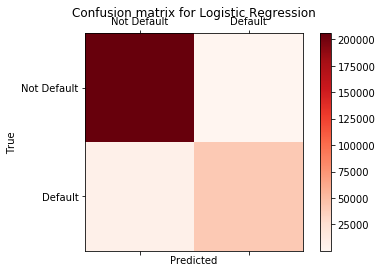

In [67]:
%matplotlib inline

# Confusion matrix, accuracy, precison and recall for random forest and logistic regression
confusion_matrices = [
    ("Logistic Regression", confusion_matrix(y_test,pred)),
]
#confusion_matrices
draw_confusion_matrices(confusion_matrices)

## KNN

In [22]:
# Train the model
classifier_KNN.fit(X_train, y_train)
classifier_KNN.predict(X_test)
classifier_KNN.score(X_test, y_test)

0.9841768658128824

## Decision Tree

In [29]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier(max_depth=5,criterion='entropy')
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

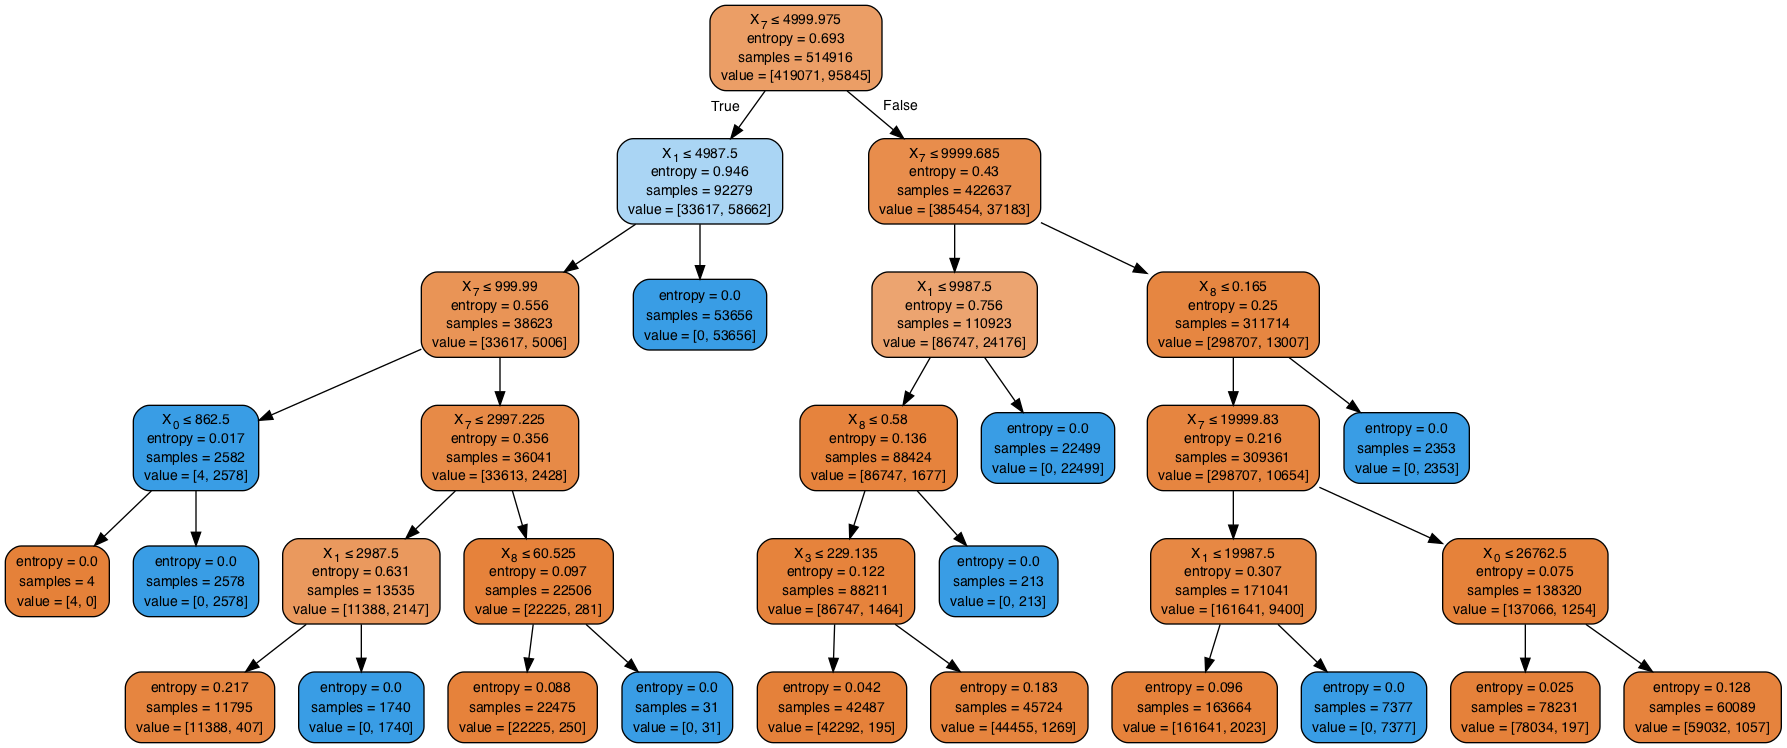

In [30]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

## Random Forest

In [108]:
# Train the model
classifier_RF.fit(X_train, y_train)
classifier_RF.predict(X_test)
classifier_RF.score(X_test, y_test)

0.9826640974828695

In [32]:
help(RandomForestClassifier().score)

Help on method score in module sklearn.base:

score(X, y, sample_weight=None) method of sklearn.ensemble.forest.RandomForestClassifier instance
    Returns the mean accuracy on the given test data and labels.
    
    In multi-label classification, this is the subset accuracy
    which is a harsh metric since you require for each sample that
    each label set be correctly predicted.
    
    Parameters
    ----------
    X : array-like, shape = (n_samples, n_features)
        Test samples.
    
    y : array-like, shape = (n_samples) or (n_samples, n_outputs)
        True labels for X.
    
    sample_weight : array-like, shape = [n_samples], optional
        Sample weights.
    
    Returns
    -------
    score : float
        Mean accuracy of self.predict(X) wrt. y.



In [3]:
try:
    a
except NameError:
    print('a')

a
